# Amphibian Genome Size Plot

This plot is generated based on the data from the Genome Size database (http://genomesize.com/). 
The data is not available in the git repository, because the redistribution of data is not allowed. 

To generate up-to-date plot, go to the following link and click "Export Data to Excel".
* http://genomesize.com/search.php?search=type&value=Amphibians&display=100

## 2021-Feb-04 version
* 928 records for 505 amphibian species 
  * 3 records for *Gymnophiona*
  * 427 records for *Urodela*
  * 498 records for *Anura*

In [5]:
# You may need to change this filename if you use your version. 
filename_tsv = 'genome_size.2021feb04.tsv'

raw_size_list = dict()
f_tsv = open(filename_tsv, 'r')
for line in f_tsv:
    if line.startswith('#'):
        continue
    tokens = line.strip().split("\t")
    family_name = tokens[4]
    raw_size = float(tokens[7])
    if family_name not in raw_size_list:
        raw_size_list[family_name] = []
    raw_size_list[family_name].append(raw_size)
f_tsv.close()

mean_size_list = dict()
for tmp_f, tmp in raw_size_list.items():
    mean_size_list[tmp_f] = sum(tmp) / len(tmp)

family_list = sorted(mean_size_list.keys(), key=mean_size_list.get, reverse=True)

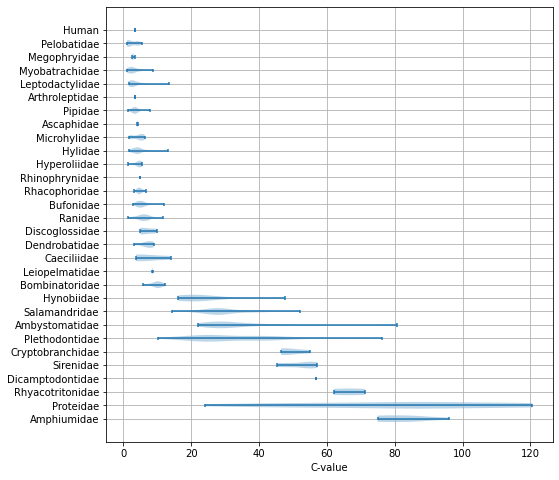

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)

data_list = []
for i in range(0, len(family_list)):
    tmp_family = family_list[i]
    data_list.append(raw_size_list[tmp_family])
data_list.append([3.50])
ax1.violinplot(data_list, vert=False)

ax1.set_yticks(range(1,len(family_list)+2))
ax1.set_yticklabels(family_list+['Human'])
ax1.grid()
ax1.set_xlabel("C-value")
plt.savefig('GenomeSize.2021feb.pdf')
plt.show()